# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari Kaggle dengan tajuk Polycystic ovary syndrome (PCOS)
dengan link dataset yaitu: https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos/data

2. **Deskripsi Dataset**:
    * Dataset ini berisi semua parameter fisik dan klinis untuk menentukan masalah terkait PCOS dan infertilitas.
    * Terdapat total 44 parameter.
    * Data ini dikumpulkan dari 10 rumah sakit berbeda di Kerala, India.
    * Satuan yang digunakan adalah kaki ke cm.
    * Tekanan darah dicatat sebagai sistolik dan diastolik secara terpisah.
    * RBS berarti Tes glukosa acak.
    * Kasus Beta-HCG disebut sebagai Kasus I dan II.
    * Indikasi Golongan Darah: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ = 15, O- = 16, AB+ = 17, AB- = 18.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
file_path_without_infertility="/content/PCOS_data_without_infertility.xlsx"

data = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

In [3]:
#menampilkan 5 baris teratas dataset PCOS without infertility
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# mengetahui informasi awal dari dataset
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

###**Analisis Statistik**

In [5]:
# melihat beberapa detail statistik dasar
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl. No,541.0,271.000000,156.317519,1.000000,136.000000,271.000000,406.000000,541.000000
Patient File No.,541.0,271.000000,156.317519,1.000000,136.000000,271.000000,406.000000,541.000000
PCOS (Y/N),541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
Age (yrs),541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight (Kg),541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
Blood Group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000


In [6]:
#mengidentifikasi fitur numerik dan kategorikal dalam dataframe
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [7]:
categorical_variables

['PCOS (Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'Unnamed: 44']

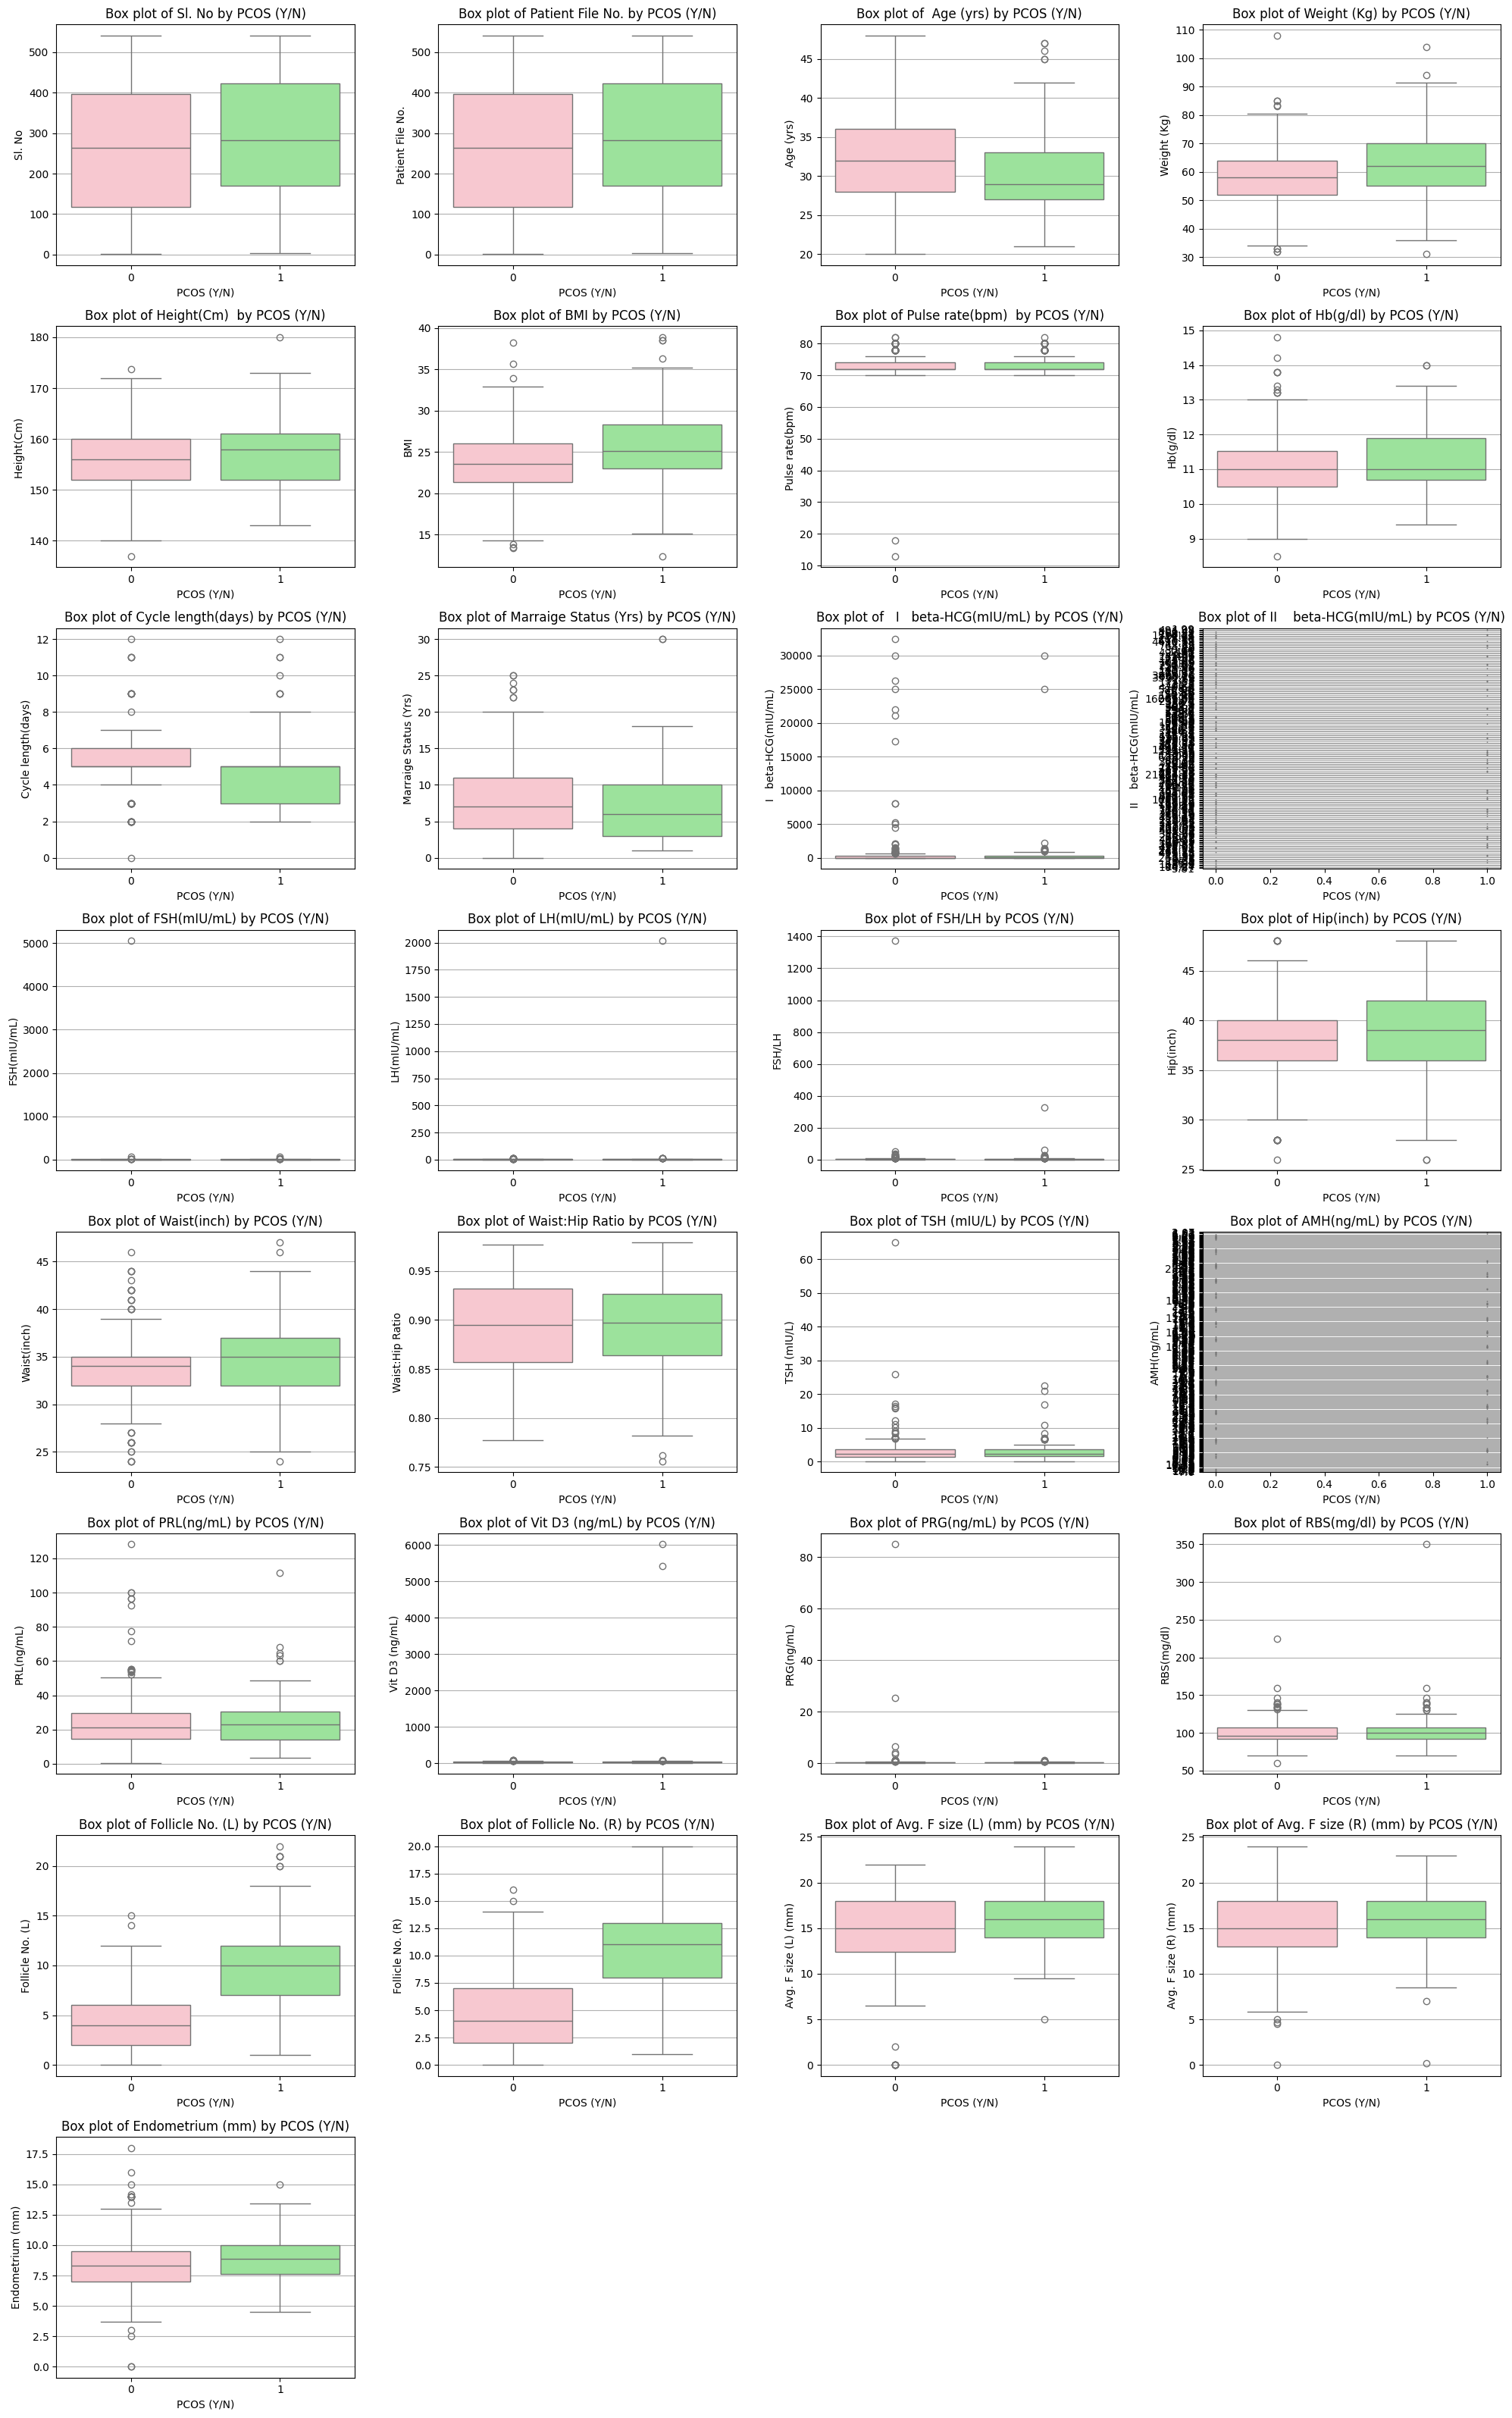

In [8]:
#membuat diagram kotak untuk variabel numerik
n_cols = 4
n_rows = (len(numerical_variables) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, y in enumerate(numerical_variables):
    sns.boxplot(y=y, x="PCOS (Y/N)", data=df, palette=["pink", "lightgreen"], hue="PCOS (Y/N)", legend=False, ax=axes[i])
    axes[i].set_title(f"Box plot of {y} by PCOS (Y/N)")
    axes[i].grid(axis='y')

#sembunyikan subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Pengamatan dari boxplot

* semakin tinggi jumlah folikel, semakin besar kecenderungan PCOS
* pasien dengan panjang siklus lebih pendek berarti lebih besar kecenderungan PCOS
* rata-rata usia pasien yang didiagnosis dengan PCOS adalah 30 tahun

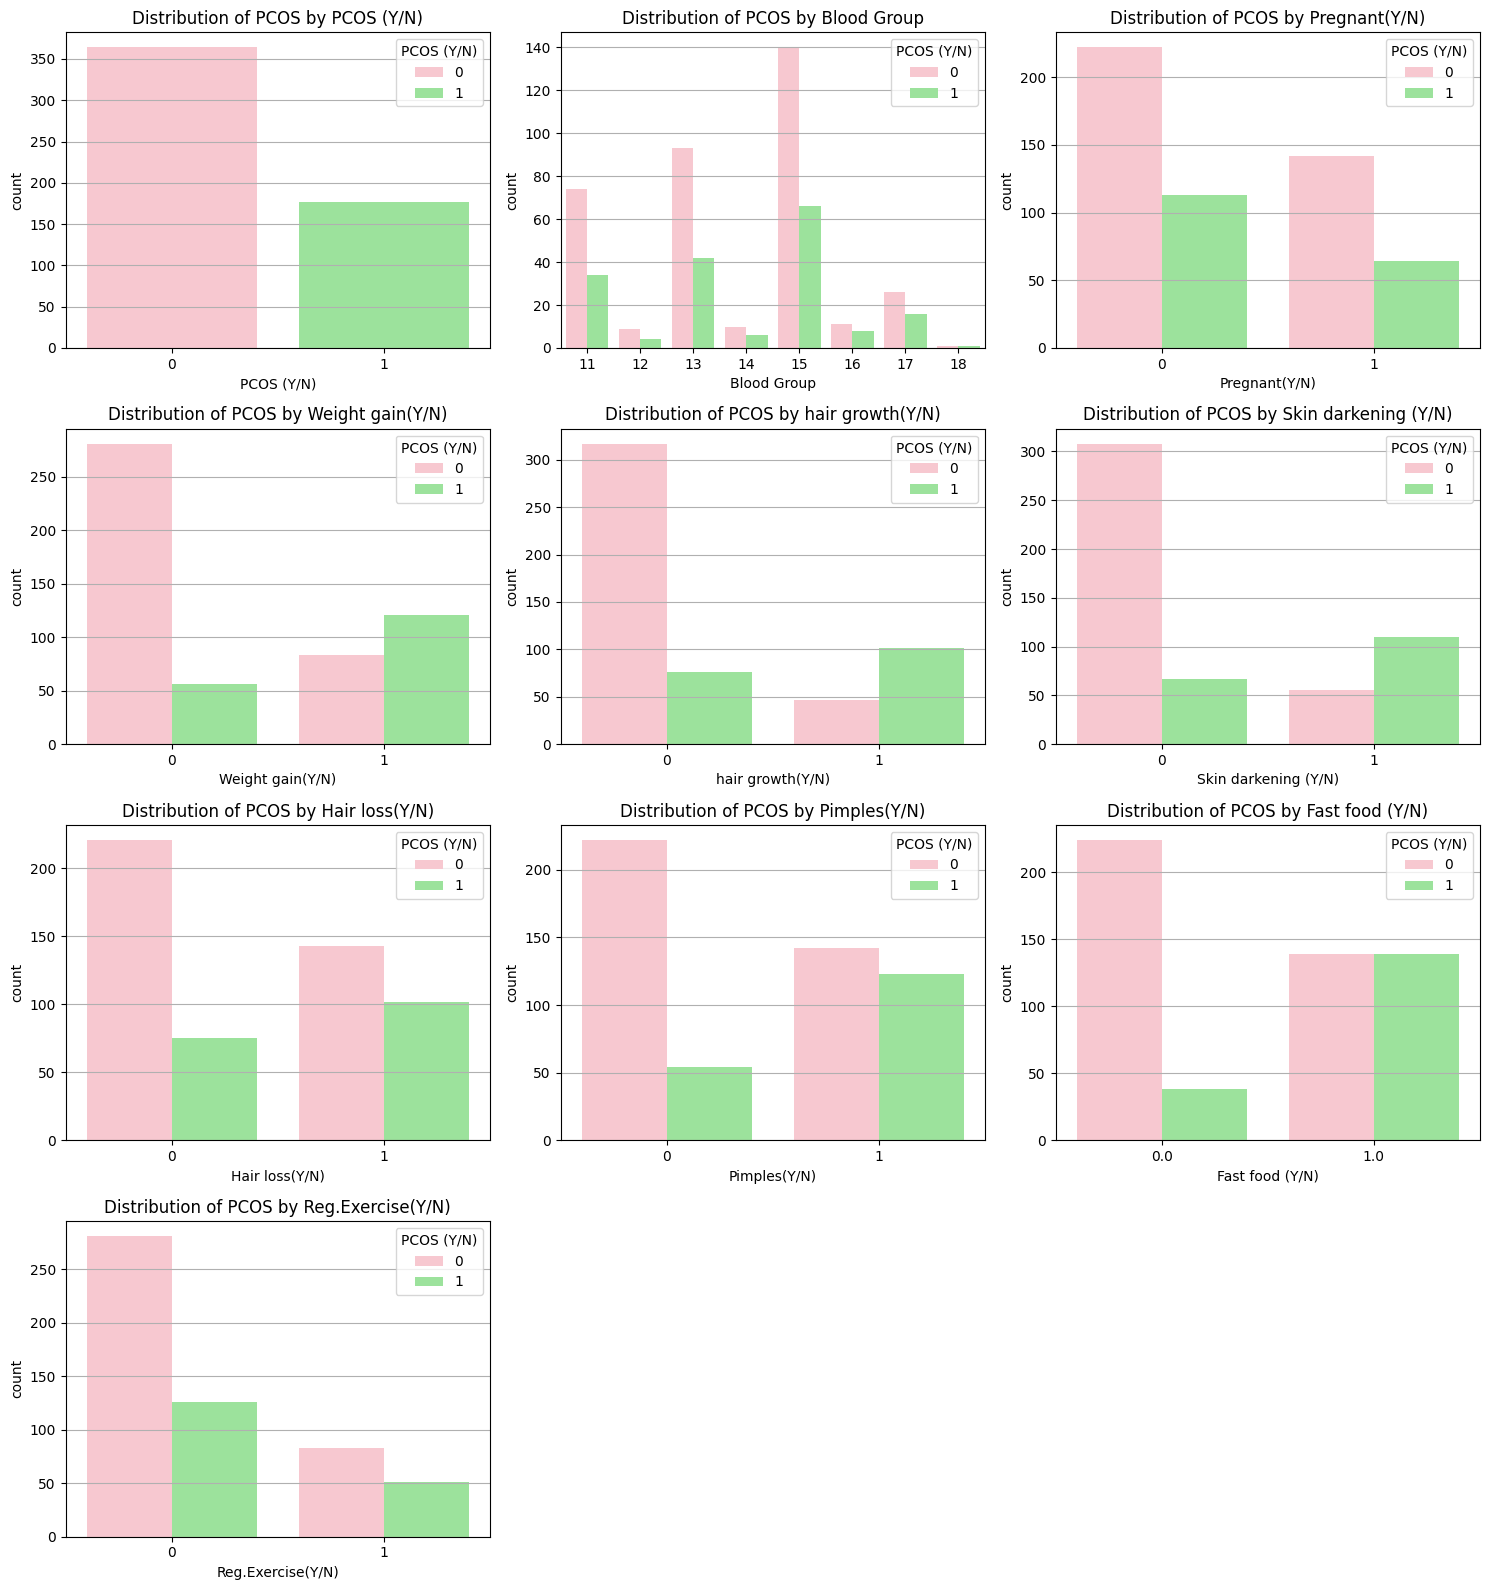

In [9]:
#membuat diagram batang untuk variabel kategorikal
n_cols = 3
categorical_variables_filtered = [x for x in categorical_variables if x != 'Unnamed: 44']
n_rows = (len(categorical_variables_filtered) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

color_palette = ["pink", "lightgreen"]

for i, x in enumerate(categorical_variables_filtered):
    sns.countplot(x=x, hue="PCOS (Y/N)", data=df, palette=color_palette, ax=axes[i])
    axes[i].set_title(f"Distribution of PCOS by {x}")
    axes[i].grid(axis='y')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observasi dari barplot:
* peningkatan berat badan, pertumbuhan rambut, jerawat, kerontokan rambut, makanan cepat saji, dan penggelapan kulit berarti kemungkinan lebih tinggi terkena PCOS. Jadi, hal-hal di atas juga bisa disebut sebagai gejala PCOS

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


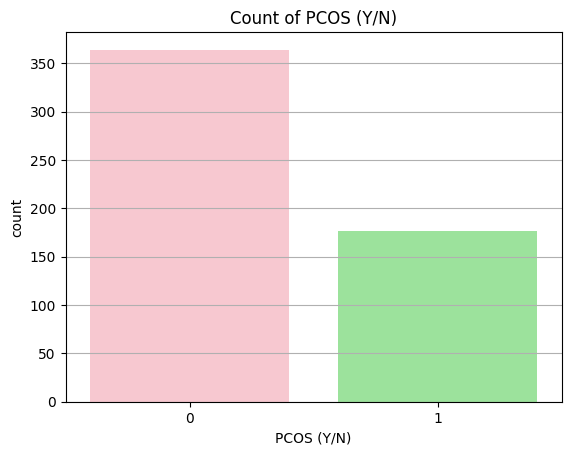

In [10]:
print(df["PCOS (Y/N)"].value_counts())

sns.countplot(x = "PCOS (Y/N)", data = df, palette=["pink", "lightgreen"], hue="PCOS (Y/N)", legend=False)
plt.title("Count of PCOS (Y/N)")
plt.grid(axis='y')
plt.show()

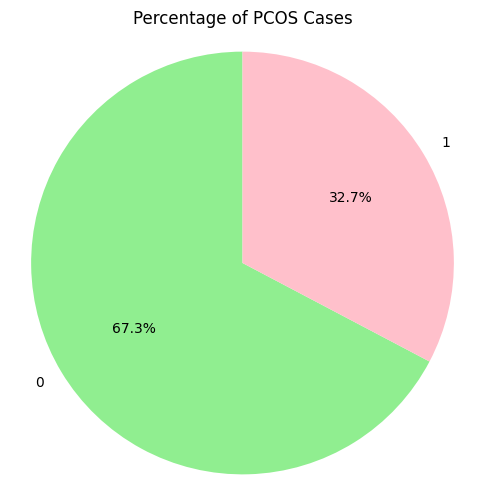

In [11]:
# hitung persentase kasus PCOS
pcos_counts = df['PCOS (Y/N)'].value_counts()
pcos_percentages = pcos_counts / len(df) * 100

# buat diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(pcos_percentages, labels=pcos_percentages.index, autopct='%1.1f%%', colors=["lightgreen", "pink"], startangle=90)
plt.title('Percentage of PCOS Cases')
plt.axis('equal')
plt.show()

In [12]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

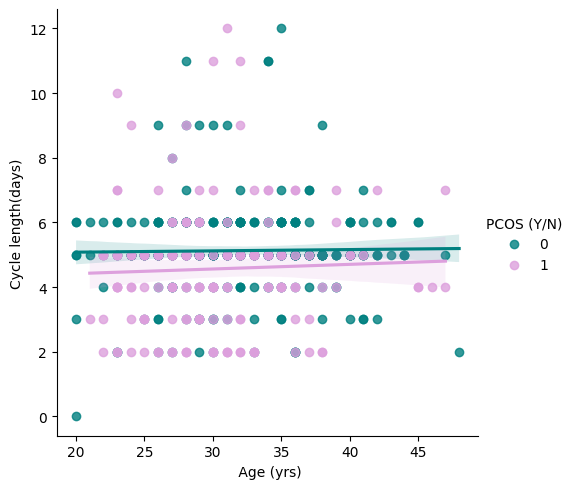

In [13]:
# durasi fase menstruasi pada PCOS vs normal
color = ["teal", "plum"]
fig=sns.lmplot(data=df,x=" Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

Panjang fase menstruasi secara keseluruhan konsisten pada berbagai usia untuk kasus normal. Sedangkan pada kasus PCOS, panjang fase meningkat seiring bertambahnya usia.

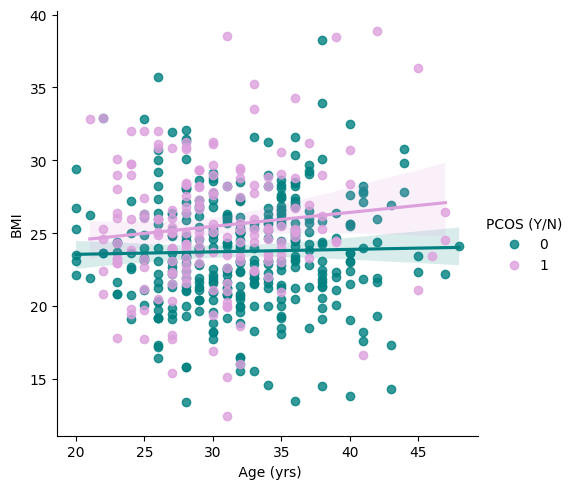

In [14]:
# pola kenaikan berat badan (BMI) selama bertahun-tahun pada PCOS dan normal.
fig= sns.lmplot(data =df,x=" Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

Indeks massa tubuh (IMT) menunjukkan konsistensi pada kasus normal. Sedangkan untuk PCOS, IMT meningkat seiring bertambahnya usia.

####**Patterns Of Irregularity In Mensuration**

Tidak ada kejelasan tentang apa yang ditunjukkan oleh fitur ini dan nilainya, tetapi, Tampaknya pada fitur "Cycle(R/I)" nilai:

* 4 menunjukkan siklus menstruasi yang tidak teratur

* 2 menunjukkan siklus menstruasi yang teratur

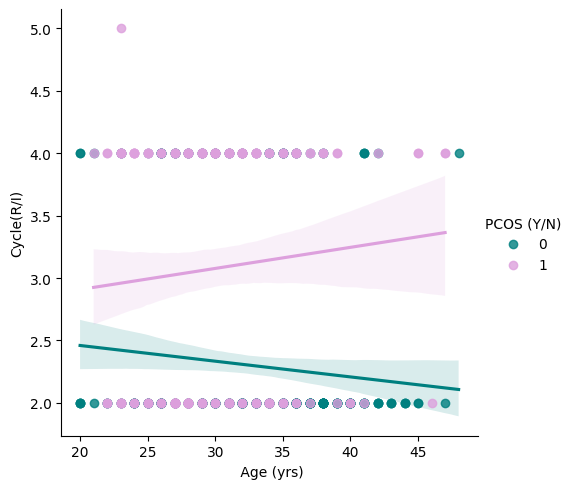

In [15]:
sns.lmplot(data =df,x=" Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

Siklus menstruasi menjadi lebih teratur pada kasus normal seiring bertambahnya usia. Sedangkan pada PCOS, ketidakaturan meningkat seiring bertambahnya usia.

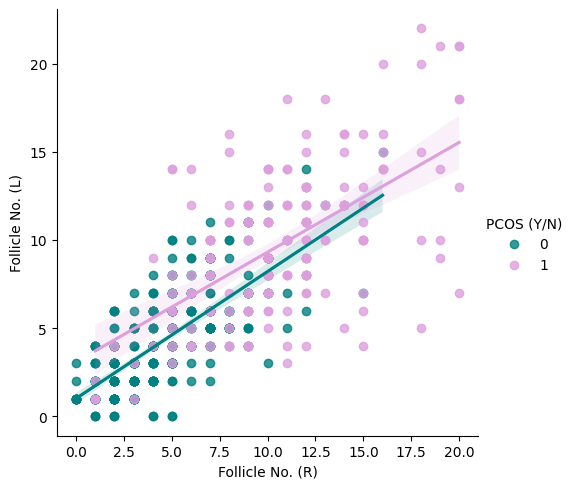

In [16]:
sns.lmplot(data = df,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

Distribusi folikel di kedua ovarium, Kiri dan Kanan, tidak sama pada wanita dengan PCOS dibandingkan dengan pasien "Normal". Ini menarik, mari kita jelajahi dengan plot boxen.

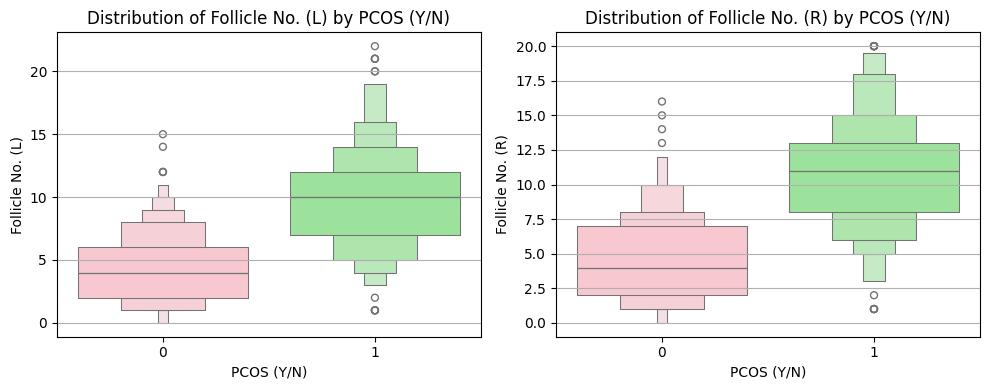

In [17]:
features = ["Follicle No. (L)","Follicle No. (R)"]
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

color_palette = ["pink", "lightgreen"]

for i, feature in enumerate(features):
    sns.boxenplot(x="PCOS (Y/N)", y=feature, data=df, palette=color_palette, hue="PCOS (Y/N)", legend=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by PCOS (Y/N)")
    axes[i].grid(axis='y')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Jumlah folikel pada wanita dengan PCOS lebih tinggi, seperti yang diharapkan. Dan juga tidak seimbang.

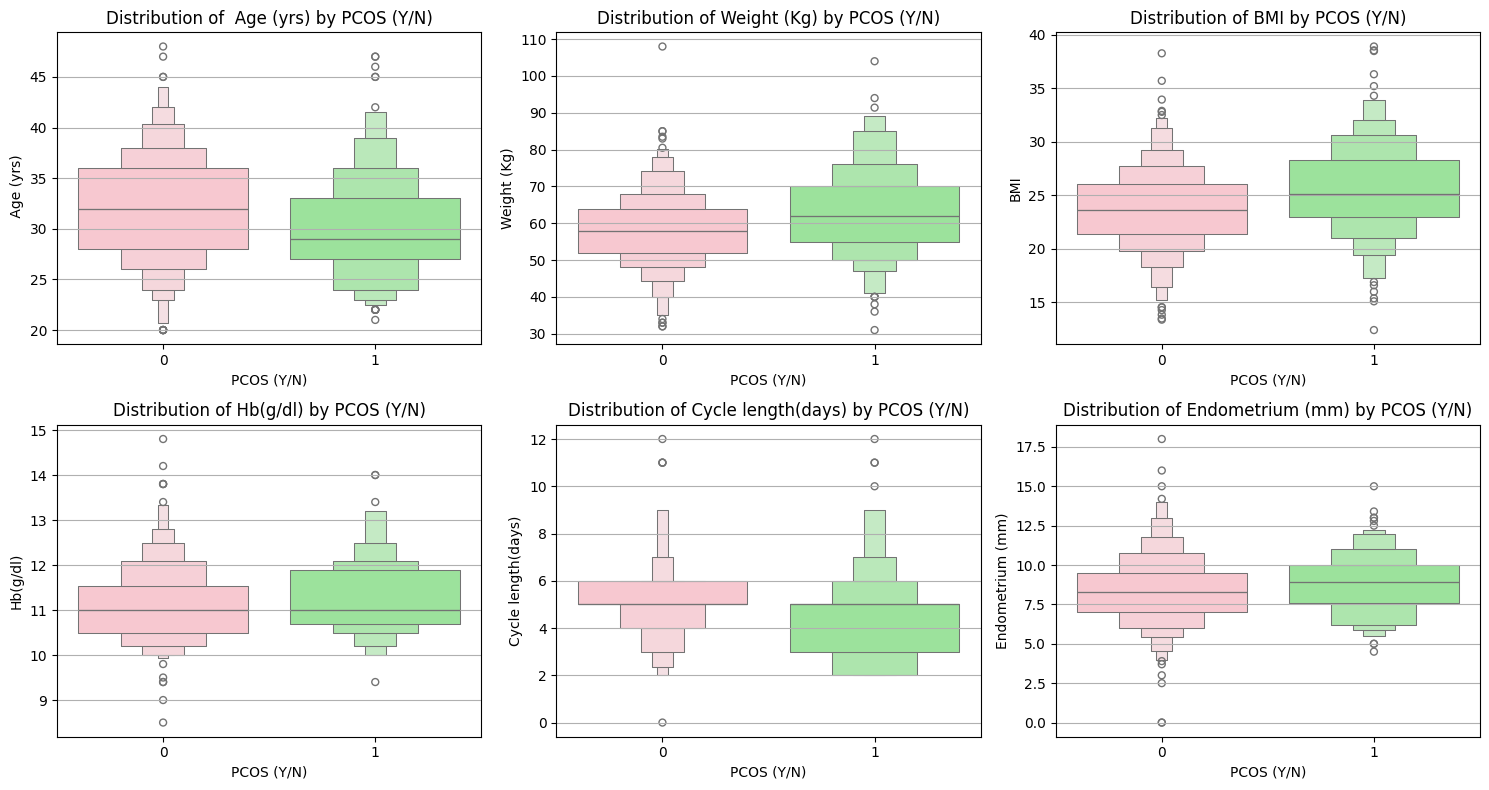

In [18]:
features = [" Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

color_palette = ["pink", "lightgreen"]

for i, feature in enumerate(features):
    sns.boxenplot(x="PCOS (Y/N)", y=feature, data=df, palette=color_palette, hue="PCOS (Y/N)", legend=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by PCOS (Y/N)")
    axes[i].grid(axis='y')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

####**Korelasi**

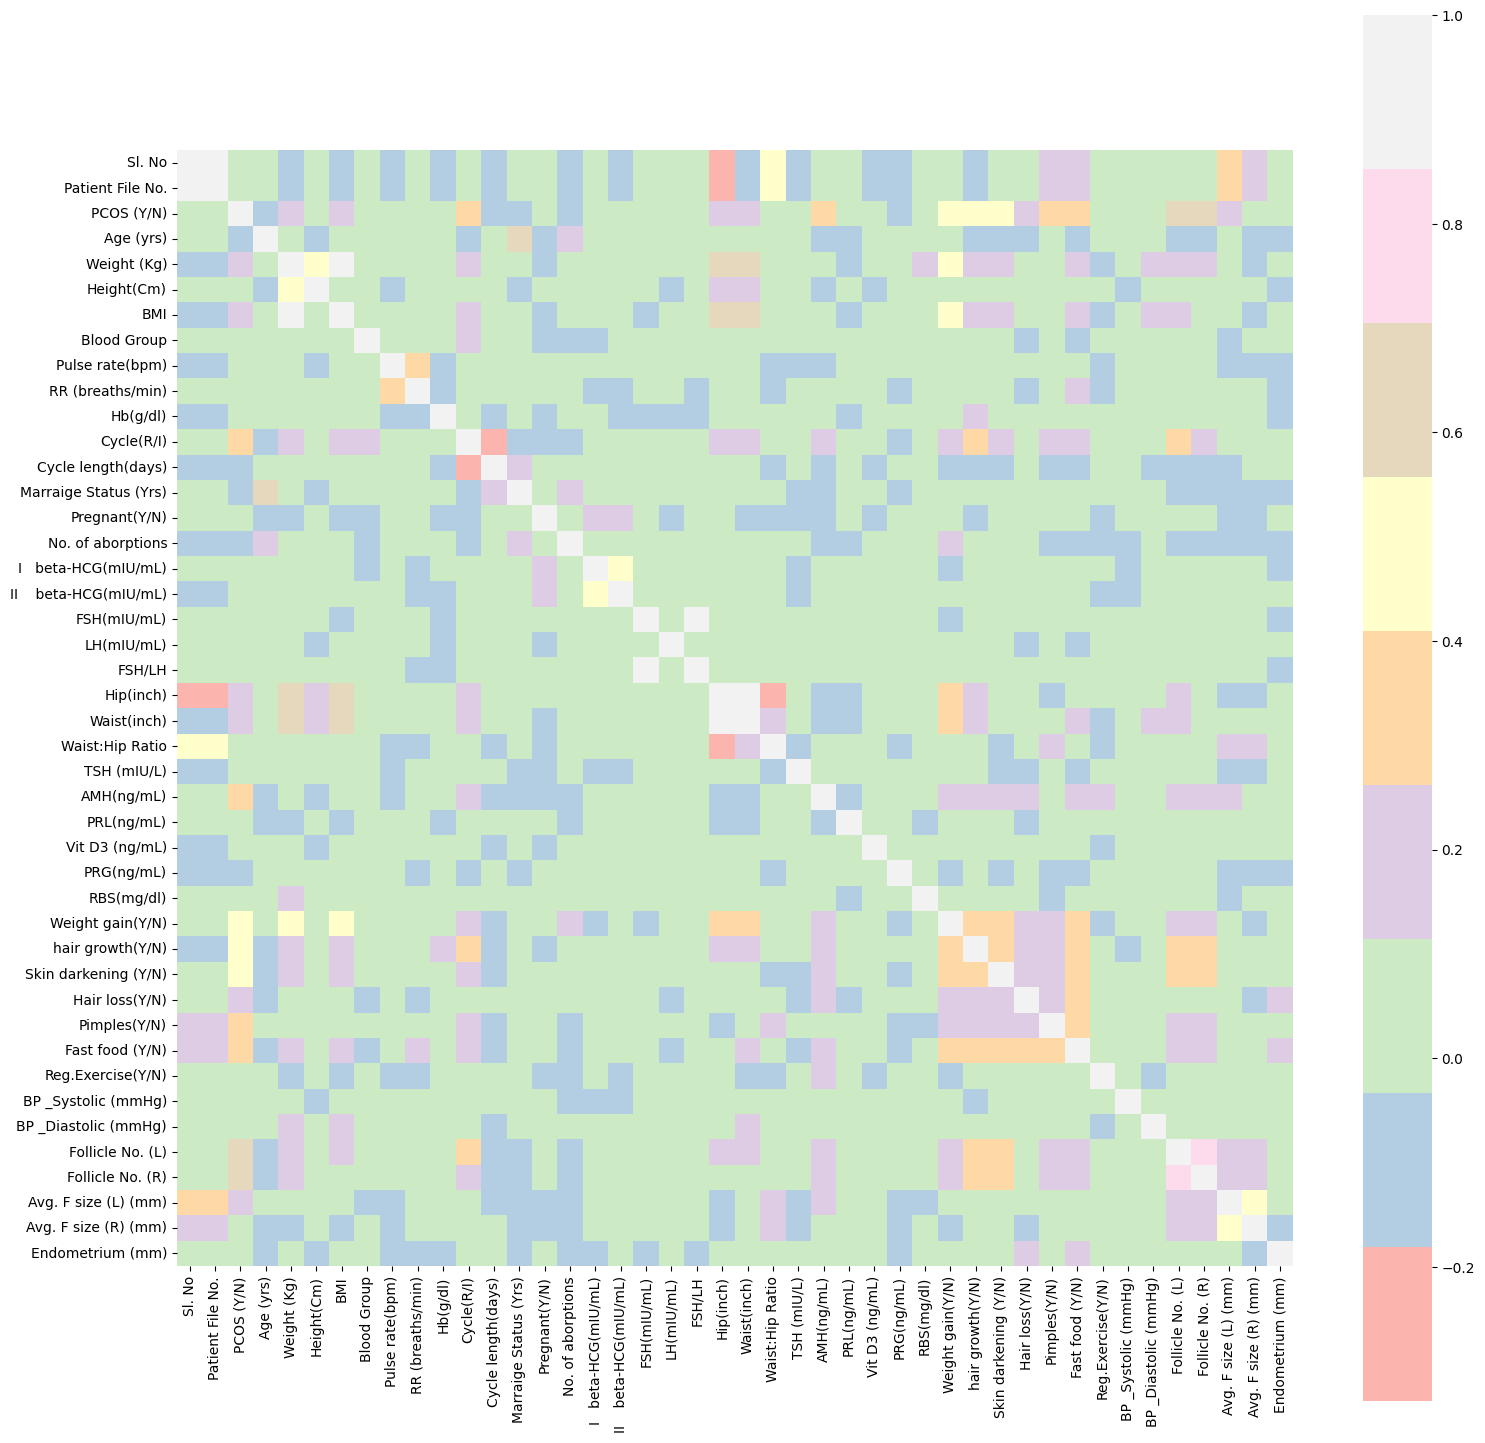

In [19]:
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df = df.drop('Unnamed: 44', axis=1)
df['Marraige Status (Yrs)'] = df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median())
df['II    beta-HCG(mIU/mL)'] = df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median())
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median())
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0])

df.columns = [col.strip() for col in df.columns]

corrmat = df.corr(numeric_only=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);
plt.show()

In [20]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

,PCOS (Y/N)
PCOS (Y/N),1.000000
Follicle No. (R),0.648327
Follicle No. (L),0.603346
Skin darkening (Y/N),0.475733
hair growth(Y/N),0.464667
Weight gain(Y/N),0.441047
Cycle(R/I),0.401644
Fast food (Y/N),0.376183
Pimples(Y/N),0.286077
AMH(ng/mL),0.264141


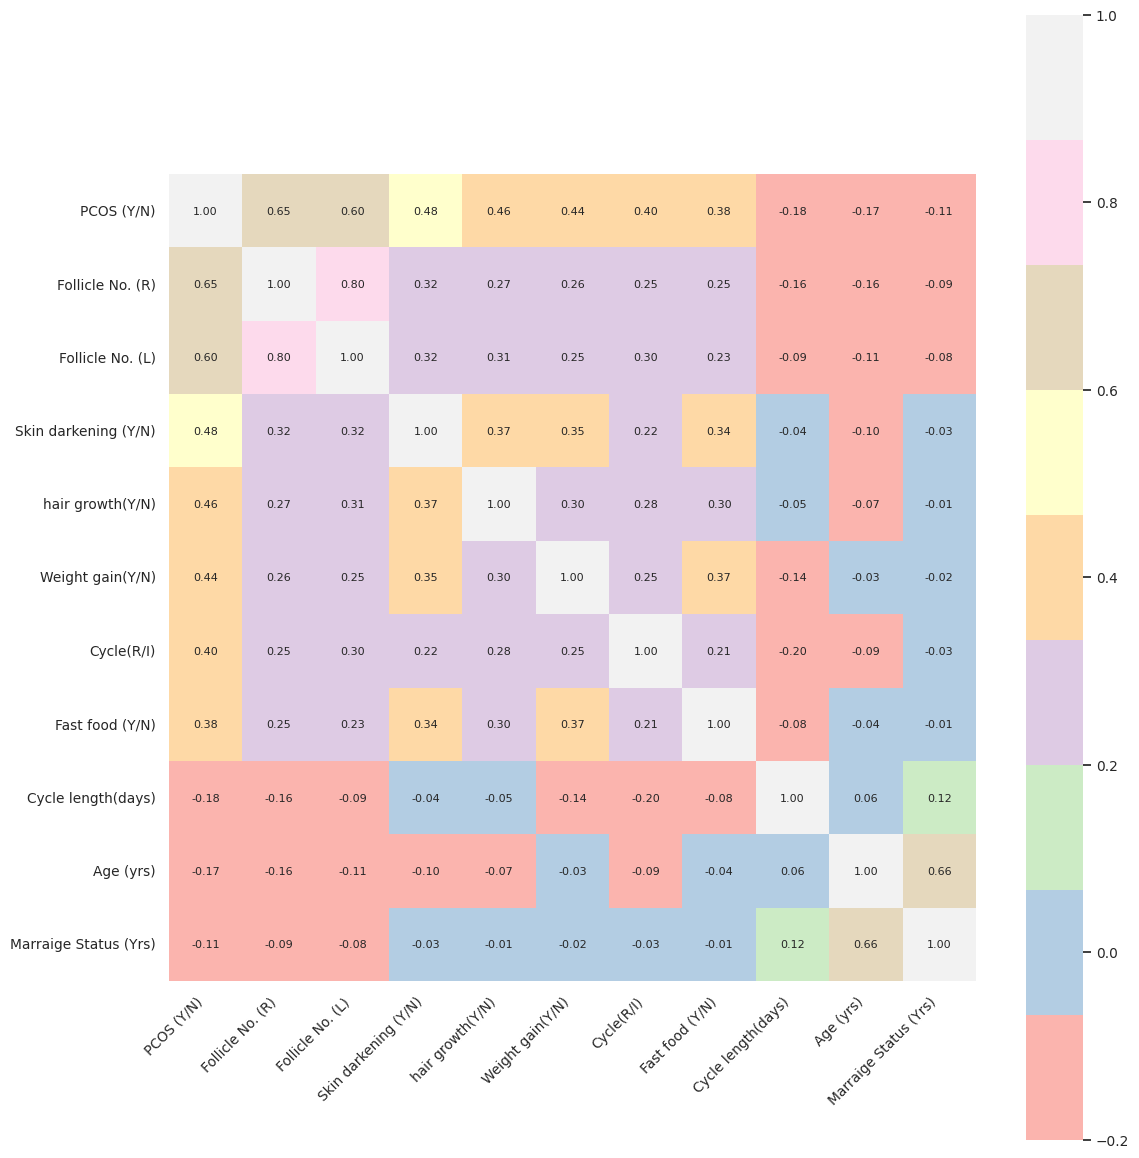

In [21]:
plt.figure(figsize=(12, 12))
k = 8
l = 3

cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n).drop_duplicates()  # Hindari duplikasi

# Pastikan tidak ada NaN
PCOS_subset = df[cols].dropna()

cm = np.corrcoef(PCOS_subset.values.T)

sns.set(font_scale=0.9)
hm = sns.heatmap(cm, cbar=True, cmap="Pastel1", annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 8},
                 yticklabels=cols.values, xticklabels=cols.values)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

####**Encoding Data Kategorikal**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [23]:
data["AMH(ng/mL)"].head()

,AMH(ng/mL)
0,2.07
1,1.53
2,6.63
3,1.22
4,2.26


In [24]:
data["II    beta-HCG(mIU/mL)"].head()

,II beta-HCG(mIU/mL)
0,1.99
1,1.99
2,494.08
3,1.99
4,801.45


Setelah melihat informasi ini, kita dapat menyimpulkan bahwa:
* Beberapa data numerik disimpan sebagai string.
* Ada beberapa nilai yang hilang. Yaitu, Status Pernikahan (Tahun) & Makanan Cepat Saji (Ya/Tidak)

In [25]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Mengisi Missing values

data['Marraige Status (Yrs)'] = data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median())
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median())
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median())
data['Fast food (Y/N)'] = data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].mode()[0])

data.columns = [col.strip() for col in data.columns]

In [26]:
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [27]:
# cek duplikasi
duplicate_rows = data.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

# hapus duplikasi
if duplicate_rows > 0:
    data.drop_duplicates(inplace=True)
    print("Baris duplikat telah dihapus.")
print(f"Jumlah baris setelah penghapusan duplikat: {len(data)}")

Jumlah baris duplikat: 0
Jumlah baris setelah penghapusan duplikat: 541


In [28]:
#normalisasi data
from sklearn.preprocessing import MinMaxScaler
X = data.drop('PCOS (Y/N)', axis=1)
y = data['PCOS (Y/N)']
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
display(X.head())

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,0.000000,0.000000,0.285714,0.176623,0.348837,0.259878,0.571429,0.942029,0.500000,0.314286,...,1.0,0.0,0.765625,0.782609,0.136364,0.15,0.750000,0.750000,0.472222,NaN
1,0.001852,0.001852,0.571429,0.441558,0.569767,0.472141,0.571429,0.884058,0.333333,0.507937,...,0.0,0.0,0.843750,0.673913,0.136364,0.25,0.625000,0.583333,0.205556,NaN
2,0.003704,0.003704,0.464286,0.490909,0.651163,0.485347,0.000000,0.855072,0.166667,0.523810,...,1.0,0.0,0.843750,0.782609,0.590909,0.75,0.750000,0.833333,0.555556,NaN
3,0.005556,0.005556,0.607143,0.441558,0.255814,0.651650,0.285714,0.855072,0.333333,0.555556,...,0.0,0.0,0.843750,0.673913,0.090909,0.10,0.625000,0.583333,0.416667,NaN
4,0.007407,0.007407,0.178571,0.272727,0.558140,0.288613,0.000000,0.855072,0.166667,0.238095,...,0.0,0.0,0.843750,0.782609,0.136364,0.20,0.666667,0.583333,0.388889,NaN


In [29]:
# Gabungkan hasil normalisasi
data = X.copy()
data['PCOS (Y/N)'] = y

display(data.head())

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,PCOS (Y/N)
0,0.000000,0.000000,0.285714,0.176623,0.348837,0.259878,0.571429,0.942029,0.500000,0.314286,...,0.0,0.765625,0.782609,0.136364,0.15,0.750000,0.750000,0.472222,NaN,0
1,0.001852,0.001852,0.571429,0.441558,0.569767,0.472141,0.571429,0.884058,0.333333,0.507937,...,0.0,0.843750,0.673913,0.136364,0.25,0.625000,0.583333,0.205556,NaN,0
2,0.003704,0.003704,0.464286,0.490909,0.651163,0.485347,0.000000,0.855072,0.166667,0.523810,...,0.0,0.843750,0.782609,0.590909,0.75,0.750000,0.833333,0.555556,NaN,1
3,0.005556,0.005556,0.607143,0.441558,0.255814,0.651650,0.285714,0.855072,0.333333,0.555556,...,0.0,0.843750,0.673913,0.090909,0.10,0.625000,0.583333,0.416667,NaN,0
4,0.007407,0.007407,0.178571,0.272727,0.558140,0.288613,0.000000,0.855072,0.166667,0.238095,...,0.0,0.843750,0.782609,0.136364,0.20,0.666667,0.583333,0.388889,NaN,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   Age (yrs)               541 non-null    float64
 3   Weight (Kg)             541 non-null    float64
 4   Height(Cm)              541 non-null    float64
 5   BMI                     541 non-null    float64
 6   Blood Group             541 non-null    float64
 7   Pulse rate(bpm)         541 non-null    float64
 8   RR (breaths/min)        541 non-null    float64
 9   Hb(g/dl)                541 non-null    float64
 10  Cycle(R/I)              541 non-null    float64
 11  Cycle length(days)      541 non-null    float64
 12  Marraige Status (Yrs)   541 non-null    float64
 13  Pregnant(Y/N)           541 non-null    float64
 14  No. of aborptions       541 non-null    fl

In [31]:
# Drop irrelevant kolom
data_selected = data.drop(['Sl. No', 'Patient File No.'], axis=1)

# Seleksi fitur berdasarkan korelasi
selected_features = [
    'PCOS (Y/N)',
    'Follicle No. (R)',
    'Follicle No. (L)',
    'Skin darkening (Y/N)',
    'hair growth(Y/N)',
    'Weight gain(Y/N)',
    'Cycle(R/I)',
    'Fast food (Y/N)',
    'Cycle length(days)',
    'Age (yrs)',
    'Marraige Status (Yrs)'
]

data_selected = data[selected_features]
display(data_selected.head())

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Cycle length(days),Age (yrs),Marraige Status (Yrs)
0,0,0.15,0.136364,0.0,0.0,0.0,0.0,1.0,0.416667,0.285714,0.233333
1,0,0.25,0.136364,0.0,0.0,0.0,0.0,0.0,0.416667,0.571429,0.366667
2,1,0.75,0.590909,0.0,0.0,0.0,0.0,1.0,0.416667,0.464286,0.333333
3,0,0.10,0.090909,0.0,0.0,0.0,0.0,0.0,0.416667,0.607143,0.133333
4,0,0.20,0.136364,0.0,0.0,0.0,0.0,0.0,0.416667,0.178571,0.033333


##**Export Dataset**

In [32]:
data_selected.to_csv('PCOS_preprocesing.csv', index=False)